# Faire des graphiques avec OpenTURNS

## Introduction

Dans ce document, nous présentons comment réaliser des graphiques avec OpenTURNS. Nous montrons comment réaliser un graphique et configurer ses axes et ses couleurs. Puis nous présentons comment composer un graphique par combinaison de plusieurs sous-éléments graphiques.

## Les méthodes draw, la classe `Graph`

La manière la plus simple de générer un graphique est d'utiliser la méthode `draw` associée à de nombreuses classes. La classe `Normal` par exemple permet de dessiner la densité de probabilité de la loi gaussienne.

In [1]:
import openturns as ot

In [2]:
n = ot.Normal()
n

class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[0] sigma=class=Point name=Unnamed dimension=1 values=[1] correlationMatrix=class=CorrelationMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[1]

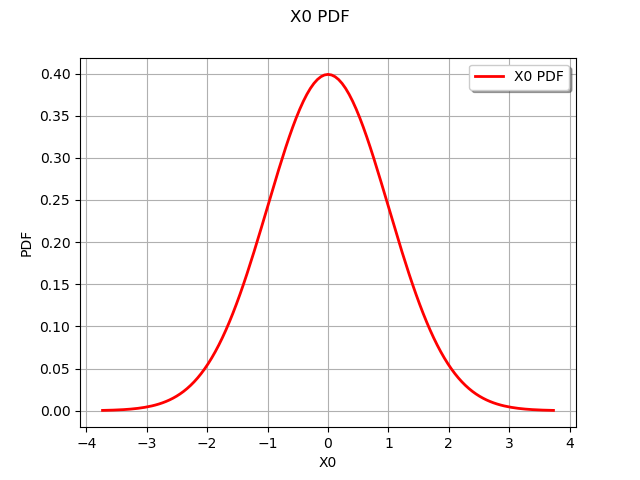

In [3]:
n.drawPDF()

Pour configurer l'apparence de ce graphique, on peut d'abord observer le type de graphique que la méthode `draw` retourne : c'est un `Graph`.

In [4]:
graph = n.drawPDF()
type(graph)

openturns.graph.Graph

La classe `Graph` dispose de plusieurs méthodes pour configurer les légendes, le titre et les couleurs. Puisqu'un graphe peut contenir plusieurs sous-graphiques, la méthode `setColors` prend en argument une liste de couleurs.

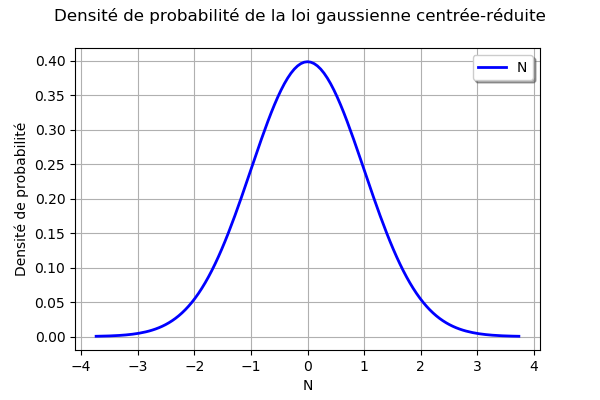

In [5]:
graph.setXTitle("N")
graph.setYTitle("Densité de probabilité")
graph.setTitle("Densité de probabilité de la loi gaussienne centrée-réduite")
graph.setLegends(["N"])
graph.setColors(["blue"])
graph

## Combiner plusieurs graphiques

Pour combiner plusieurs graphiques dans un seul, on peut utiliser la méthode `add`.

Nous commençons par créer un histogramme empirique associé à un échantillon.

In [6]:
sample = n.getSample(100)

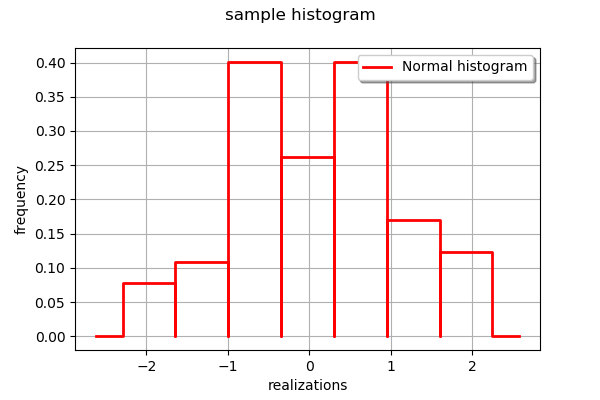

In [7]:
histo = ot.VisualTest_DrawHistogram(sample)
histo

Puis nous ajoutons l'histogramme au graphique `graph` avec la méthode `add`. L'objet `graph` contient désormais deux courbes superposées.

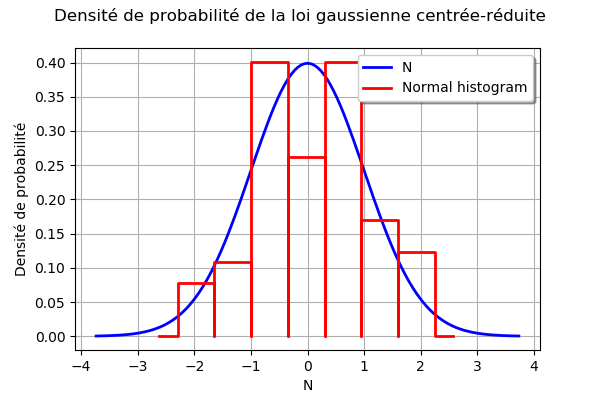

In [8]:
graph.add(histo)
graph

## Faire des matrices de graphiques

La librairie ne dispose *pas* d'objets permettant de réaliser des matrices de graphiques. Certes, l'objet `Pairs` permet de dessiner les projections 2D d'un nuage de points multidimensionnel ; cet objet ne permet toutefois pas d'accéder directement aux éléments de la matrice.

En complément, nous pouvons toutefois utiliser la fonctino `add_subplot` de Matplotlib.

Nous commençons par créer deux graphiques de la densité de probabilité et de la fonction de répartition de la variable `n`.

In [10]:
myPDF = n.drawPDF()
myCDF = n.drawCDF()

In [11]:
import pylab as pl

Nous créons un graphique avec la fonction `figure` de Matplotlib, puis nous ajoutons un graphique avec la méthode Puis nous utilisons la fonction `viewer.View` pour créer l'objet Matplotlib. 

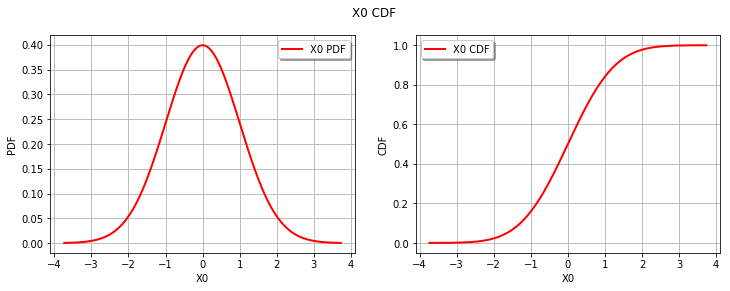

In [23]:
fig = pl.figure(figsize=(12, 4))
ax_pdf = fig.add_subplot(1, 2, 1)
_ = ot.viewer.View(myPDF, figure=fig, axes=[ax_pdf])
ax_cdf = fig.add_subplot(1, 2, 2)
_ = ot.viewer.View(myCDF, figure=fig, axes=[ax_cdf])